# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [2]:
#describe
data['month']=pd.DatetimeIndex(data['transaction_date']).month

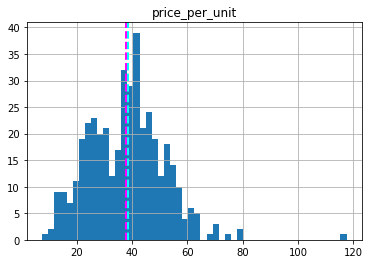

In [3]:
#Price per unit exploration 1
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,4))
output=data['price_per_unit']
output.hist(bins=50)
ax=fig.gca()
ax.axvline(output.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(output.median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('price_per_unit')
plt.show()

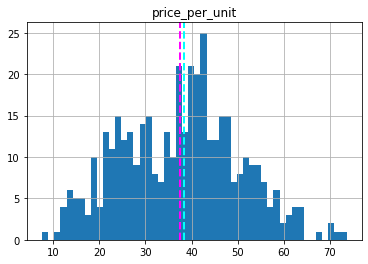

In [4]:
#Price per unit exploration after outlier removal

data = data[data['price_per_unit'] <= 76]

fig = plt.figure(figsize=(6,4))
output=data['price_per_unit']
output.hist(bins=50)
ax=fig.gca()
ax.axvline(output.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(output.median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('price_per_unit')
plt.show()

In [5]:
num_features = ['house_age', 'transit_distance', 'latitude', 'longitude']
cat_features = ['local_convenience_stores', 'transaction_date']
data[num_features + ['price_per_unit']].describe()

,house_age,transit_distance,latitude,longitude,price_per_unit
count,411.000000,411.000000,411.000000,411.000000,411.000000
mean,17.638929,1089.953902,24.968993,121.533328,37.591241
std,11.354608,1264.697946,0.012446,0.015391,12.768915
min,0.000000,23.382840,24.932070,121.473530,7.600000
25%,8.950000,289.324800,24.962990,121.527600,27.500000
50%,16.100000,492.231300,24.971100,121.538630,38.400000
75%,27.800000,1455.798000,24.977705,121.543395,46.300000
max,43.800000,6488.021000,25.014590,121.566270,73.600000


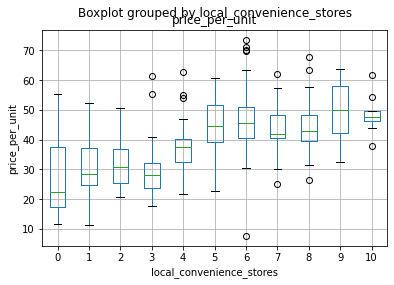

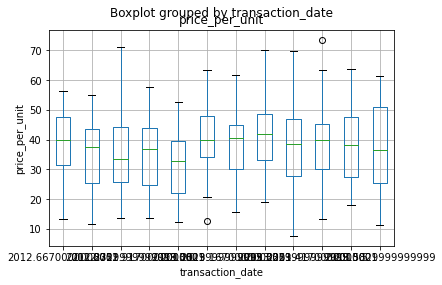

In [6]:
for j in cat_features:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    data.boxplot(column='price_per_unit', by=j, ax=ax)
    plt.xlabel(j)
    plt.ylabel('price_per_unit')
plt.show()

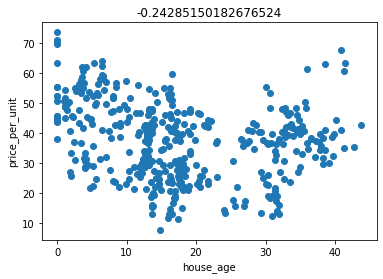

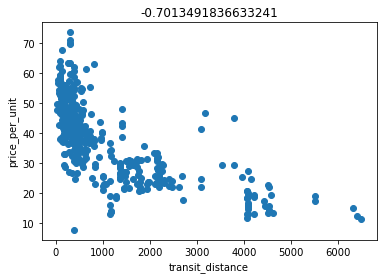

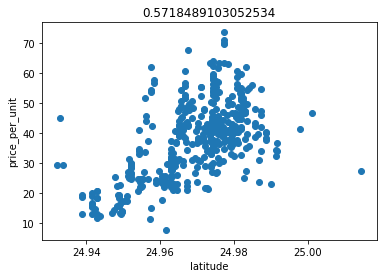

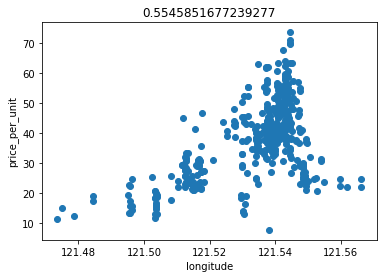

In [7]:
# Your code to explore data and train a regression model
for i in num_features:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature= data[i]
    predict=data['price_per_unit']
    correlation = feature.corr(predict)
    plt.scatter(x=feature, y=predict)
    plt.xlabel(i)
    plt.ylabel('price_per_unit')
    ax.set_title(correlation)
plt.show()

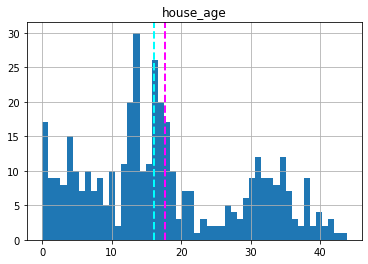

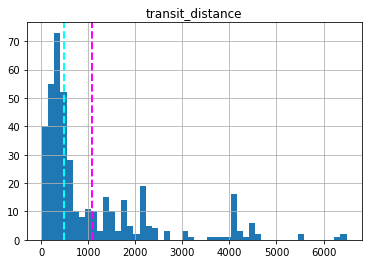

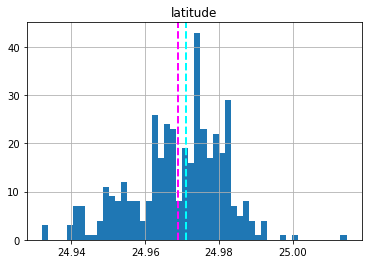

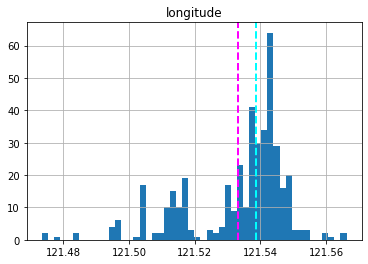

In [8]:
#Histogram - Numerical Data

for i in num_features:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.gca()
    feature=data[i]
    feature.hist(bins=50)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(i)
plt.show()

In [9]:
#feature engineering
from sklearn.model_selection import train_test_split
I, o = data[['house_age', 'transit_distance', 'local_convenience_stores', 'latitude', 'longitude']].values, data['price_per_unit'].values
I_train, I_test, o_train, o_test = train_test_split(I, o, test_size=0.3, random_state=0)

In [10]:
#train and evaluate regression model
import numpy as np
#train
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(I_train, o_train)
#predict
predictions = model.predict(I_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,o_test[:10])


Predicted labels:  [15. 36. 38. 52. 29. 48. 44. 33. 33. 33.]
Actual labels   :  [16.7 36.8 30.9 44.9 23.2 45.5 45.4 41.4 29.4 39.6]


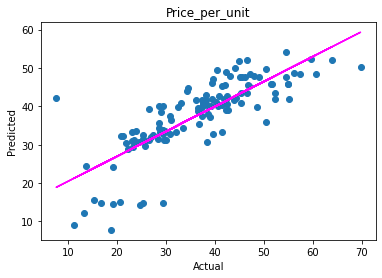

In [11]:
#evaluate
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(o_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Price_per_unit')
# overlay the regression line
z = np.polyfit(o_test, predictions, 1)
p = np.poly1d(z)
plt.plot(o_test,p(o_test), color='magenta')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(o_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(o_test, predictions)
print("R2:", r2)

MSE: 53.41413035925031
RMSE: 7.3084971341070055
R2: 0.6221831086300031


Best parameter combination: {'learning_rate': 0.25, 'n_estimators': 50} 

GradientBoostingRegressor(learning_rate=0.25, n_estimators=50) 

MSE: 32.08346283307101
RMSE: 5.66422658737016
R2: 0.7730624066993449


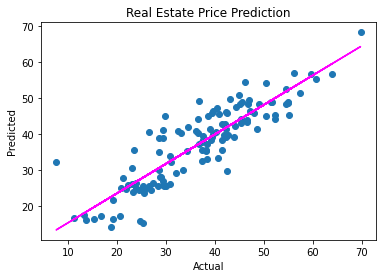

In [13]:
#Ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.ensemble import GradientBoostingRegressor

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
 'n_estimators' : [50, 75, 100, 125, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=5, return_train_score=True)
gridsearch.fit(I_train, o_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(I_test)
mse = mean_squared_error(o_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(o_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(o_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Real Estate Price Prediction')
# overlay the regression line
z = np.polyfit(o_test, predictions, 1)
p = np.poly1d(z)
plt.plot(o_test,p(o_test), color='magenta')
plt.show()

In [14]:
#import model
import joblib
filename='./models/REPred.pkl'
joblib.dump(model, filename)

['./models/REPred.pkl']

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [15]:
repredfile= joblib.load(filename)
x_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                 [13.6,4082.015,0,24.94155,121.50381]])
re_pred=repredfile.predict(x_new)
for prediction in re_pred:
    print(np.round(prediction))

49.0
16.0
